## Dataset (Load , exploration and  Cleaning)


In [1]:
# calculations and Dataframe
import pandas as pd
import numpy as np

# plot facial expression 
import matplotlib.pyplot as plt
from skimage import io

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

# Paquetes necesarios para la conversión de imágenes de color a escala de grises
from skimage.color import rgb2gray
from skimage.filters import gaussian


d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load dataset
dataset_facial_expression = pd.read_csv("../fer2013.csv")


#### Data exploration

In [3]:
# display the top five
dataset_facial_expression.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
# display the last five
dataset_facial_expression.tail()


,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


#### Detecting missing, nan or null

In [5]:
# Summary statistics: Numeric data
dataset_facial_expression.describe()


,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
# verifying the type  
type(dataset_facial_expression)


pandas.core.frame.DataFrame

In [7]:
# verifying the size  
len(dataset_facial_expression)


35887

In [8]:
# verifying the info  
dataset_facial_expression.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [9]:
# shuffling its contents.
dataset_facial_expression = dataset_facial_expression.sample(frac=1).reset_index(drop=True)
dataset_facial_expression


,emotion,pixels,Usage
0,6,92 94 91 93 93 92 95 92 90 90 90 93 79 49 50 5...,Training
1,3,255 255 255 255 255 255 255 255 255 255 255 25...,PrivateTest
2,3,187 173 153 55 53 25 21 14 20 28 27 40 37 29 1...,Training
3,2,238 239 238 238 239 237 246 133 48 43 39 26 26...,Training
4,0,7 8 0 0 5 55 92 93 95 100 105 119 123 120 121 ...,Training
5,2,179 179 179 177 179 160 95 84 114 172 199 194 ...,Training
6,0,74 71 73 92 103 106 122 136 146 149 154 155 15...,Training
7,5,226 228 228 227 227 230 231 231 231 232 232 23...,PublicTest
8,6,64 63 43 43 25 24 9 5 5 5 6 6 5 6 6 6 6 6 6 6 ...,Training
9,0,255 255 255 255 255 255 255 255 254 254 255 18...,Training


#### Data Exploration and plot pixels

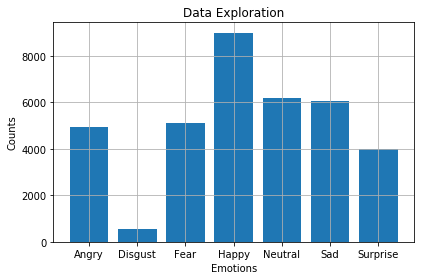

,emotion,count
3,Happy,8989
6,Neutral,6198
4,Sad,6077
2,Fear,5121
0,Angry,4953
5,Surprise,4002
1,Disgust,547


In [10]:
# Histogram of the emotions frecuency 
delais_emotion_label = ("Happy" , "Neutral", "Sad", "Fear" , "Angry", "Surprise" ,"Disgust")
delais_emotion = pd.DataFrame(data=dataset_facial_expression["emotion"].value_counts())

delais_emotion["count"] = delais_emotion["emotion"]
delais_emotion["emotion"] = delais_emotion_label
delais_emotion
%matplotlib inline
fig, ax = plt.subplots()

ax.bar(delais_emotion["emotion"], delais_emotion["count"] )
ax.set_title("Data Exploration")
ax.set_ylabel("Counts")
ax.set_xlabel("Emotions")
ax.grid()

fig.tight_layout()
plt.show()
delais_emotion


## 

In [11]:
# Agree of data exploration , it concludes that the Dataframe have not the format for pass to model 
# Now I must create the matrix with dimensions (35887, 48 ,48) and fill witch the information that contents dataframe
y = np.zeros((35887, 48, 48))
#35887
for i in range(35887):
    imagen = dataset_facial_expression["pixels"][0+i]
    imagen_list_pixel = imagen.split(" ")
    imagen_array_pixel = np.asarray(imagen_list_pixel, dtype=float)   
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)
    """image_gray = rgb2gray(imagen_rezise_pixel[0])
    imagen_array_pixel = np.asarray(image_gray, dtype=float)
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)
    image_gray = rgb2gray(imagen_rezise_pixel[0])
    image_gray = gaussian(image_gray, 1)
    image_eroded = image_gray-erosion(image_gray,disk(1.8))
    imagen_array_pixel = np.asarray(image_gray, dtype=float)
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)"""
    y[i] = y[i]+imagen_rezise_pixel[0]
    

In [12]:
# I must create the dataset for train with 80% of the information and dataset for test with 20% remaining
train_images = y[:28709]
train_labels = np.array(dataset_facial_expression["emotion"][:28709])
test_images = y[28710:]
test_labels = np.array( dataset_facial_expression["emotion"][28710:])

train_images = train_images / 255.0
test_images = test_images / 255.0

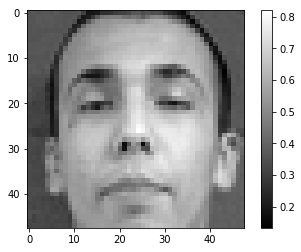

In [13]:
# Plot one for verify the functioning correct  of the datasets
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.grid(False)

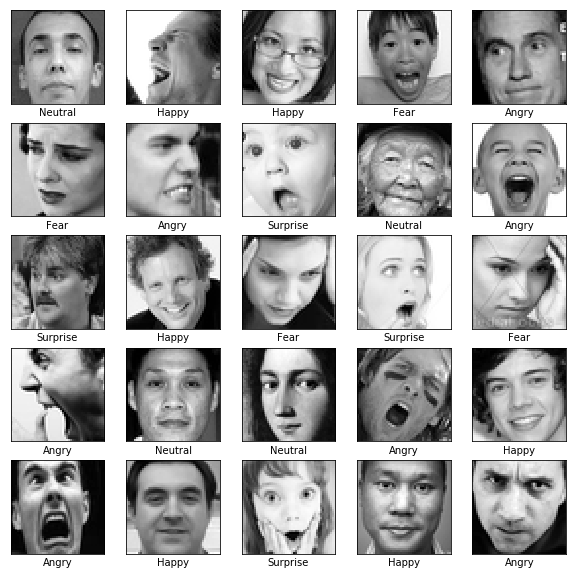

In [14]:
# Plot twenty five  for verify the labes and photos
class_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="gray")
    plt.xlabel(class_names[train_labels[i]]) 


In [15]:
# created the model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [16]:
# defined the optimizer , loss and metrics
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [17]:
# run training 1000 times
model.fit(train_images, train_labels, epochs=1000)

Epoch 1/1000
28709/28709 [==============================] - 5s 174us/step - loss: 1.7828 - acc: 0.2820
Epoch 2/1000
28709/28709 [==============================] - 5s 166us/step - loss: 1.7046 - acc: 0.3289
Epoch 3/1000
28709/28709 [==============================] - 5s 168us/step - loss: 1.6774 - acc: 0.3396
Epoch 4/1000
28709/28709 [==============================] - 5s 174us/step - loss: 1.6572 - acc: 0.3535
Epoch 5/1000
28709/28709 [==============================] - 5s 167us/step - loss: 1.6443 - acc: 0.3579
Epoch 6/1000
28709/28709 [==============================] - 11s 376us/step - loss: 1.6301 - acc: 0.3611
Epoch 7/1000
28709/28709 [==============================] - 5s 167us/step - loss: 1.6200 - acc: 0.3671
Epoch 8/1000
28709/28709 [==============================] - 7s 243us/step - loss: 1.6131 - acc: 0.3700
Epoch 9/1000
28709/28709 [==============================] - 9s 321us/step - loss: 1.6064 - acc: 0.3735
Epoch 10/1000
28709/28709 [==============================] - 5s 169us/st

28709/28709 [==============================] - 12s 411us/step - loss: 1.4811 - acc: 0.4267
Epoch 80/1000
28709/28709 [==============================] - 5s 165us/step - loss: 1.4793 - acc: 0.4293
Epoch 81/1000
28709/28709 [==============================] - 5s 164us/step - loss: 1.4805 - acc: 0.4235
Epoch 82/1000
28709/28709 [==============================] - 12s 409us/step - loss: 1.4828 - acc: 0.4242
Epoch 83/1000
28709/28709 [==============================] - 5s 164us/step - loss: 1.4744 - acc: 0.4267
Epoch 84/1000
28709/28709 [==============================] - 5s 179us/step - loss: 1.4731 - acc: 0.4278
Epoch 85/1000
28709/28709 [==============================] - 11s 379us/step - loss: 1.4795 - acc: 0.4240
Epoch 86/1000
28709/28709 [==============================] - 5s 168us/step - loss: 1.4745 - acc: 0.4292
Epoch 87/1000
28709/28709 [==============================] - 11s 377us/step - loss: 1.4724 - acc: 0.4291
Epoch 88/1000
28709/28709 [==============================] - 6s 206us/step

28709/28709 [==============================] - 11s 373us/step - loss: 1.4280 - acc: 0.4507
Epoch 158/1000
28709/28709 [==============================] - 5s 164us/step - loss: 1.4270 - acc: 0.4505
Epoch 159/1000
28709/28709 [==============================] - 8s 276us/step - loss: 1.4265 - acc: 0.4514
Epoch 160/1000
28709/28709 [==============================] - 8s 280us/step - loss: 1.4297 - acc: 0.4445
Epoch 161/1000
28709/28709 [==============================] - 5s 164us/step - loss: 1.4241 - acc: 0.4493
Epoch 162/1000
28709/28709 [==============================] - 11s 392us/step - loss: 1.4305 - acc: 0.4465
Epoch 163/1000
28709/28709 [==============================] - 5s 164us/step - loss: 1.4245 - acc: 0.4518
Epoch 164/1000
28709/28709 [==============================] - 5s 164us/step - loss: 1.4200 - acc: 0.4523
Epoch 165/1000
28709/28709 [==============================] - 11s 398us/step - loss: 1.4298 - acc: 0.4506
Epoch 166/1000
28709/28709 [==============================] - 5s 16

Epoch 235/1000
28709/28709 [==============================] - 10s 345us/step - loss: 1.3909 - acc: 0.4648
Epoch 236/1000
28709/28709 [==============================] - 5s 182us/step - loss: 1.3882 - acc: 0.4639
Epoch 237/1000
28709/28709 [==============================] - 12s 422us/step - loss: 1.3871 - acc: 0.4658
Epoch 238/1000
28709/28709 [==============================] - 5s 163us/step - loss: 1.3876 - acc: 0.4640
Epoch 239/1000
28709/28709 [==============================] - 6s 203us/step - loss: 1.3893 - acc: 0.4655
Epoch 240/1000
28709/28709 [==============================] - 10s 363us/step - loss: 1.3885 - acc: 0.4684
Epoch 241/1000
28709/28709 [==============================] - 5s 164us/step - loss: 1.3930 - acc: 0.4652
Epoch 242/1000
28709/28709 [==============================] - 8s 288us/step - loss: 1.3874 - acc: 0.4652
Epoch 243/1000
28709/28709 [==============================] - 9s 299us/step - loss: 1.3858 - acc: 0.4675
Epoch 244/1000
28709/28709 [========================

28709/28709 [==============================] - 6s 199us/step - loss: 1.3677 - acc: 0.4763
Epoch 313/1000
28709/28709 [==============================] - 12s 417us/step - loss: 1.3633 - acc: 0.4757
Epoch 314/1000
28709/28709 [==============================] - 5s 187us/step - loss: 1.3624 - acc: 0.4801 1s - los
Epoch 315/1000
28709/28709 [==============================] - 12s 418us/step - loss: 1.3598 - acc: 0.4765
Epoch 316/1000
28709/28709 [==============================] - 5s 180us/step - loss: 1.3662 - acc: 0.4756
Epoch 317/1000
28709/28709 [==============================] - 11s 398us/step - loss: 1.3623 - acc: 0.4758
Epoch 318/1000
28709/28709 [==============================] - 7s 243us/step - loss: 1.3554 - acc: 0.4765
Epoch 319/1000
28709/28709 [==============================] - 11s 395us/step - loss: 1.3655 - acc: 0.4752
Epoch 320/1000
28709/28709 [==============================] - 8s 263us/step - loss: 1.3565 - acc: 0.4777
Epoch 321/1000
28709/28709 [=============================

28709/28709 [==============================] - 5s 157us/step - loss: 1.3457 - acc: 0.4824
Epoch 390/1000
28709/28709 [==============================] - 10s 335us/step - loss: 1.3410 - acc: 0.4856
Epoch 391/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3389 - acc: 0.4871
Epoch 392/1000
28709/28709 [==============================] - 4s 157us/step - loss: 1.3333 - acc: 0.4863
Epoch 393/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3445 - acc: 0.4810
Epoch 394/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3462 - acc: 0.4847
Epoch 395/1000
28709/28709 [==============================] - 9s 325us/step - loss: 1.3386 - acc: 0.4836
Epoch 396/1000
28709/28709 [==============================] - 5s 168us/step - loss: 1.3448 - acc: 0.4843
Epoch 397/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3435 - acc: 0.4802
Epoch 398/1000
28709/28709 [==============================] - 4s 156u

28709/28709 [==============================] - 4s 156us/step - loss: 1.3256 - acc: 0.4896
Epoch 468/1000
28709/28709 [==============================] - 5s 158us/step - loss: 1.3208 - acc: 0.4917
Epoch 469/1000
28709/28709 [==============================] - 8s 278us/step - loss: 1.3246 - acc: 0.4864
Epoch 470/1000
28709/28709 [==============================] - 6s 202us/step - loss: 1.3298 - acc: 0.4870
Epoch 471/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3281 - acc: 0.4870
Epoch 472/1000
28709/28709 [==============================] - 5s 165us/step - loss: 1.3326 - acc: 0.4861
Epoch 473/1000
28709/28709 [==============================] - 5s 157us/step - loss: 1.3189 - acc: 0.4927
Epoch 474/1000
28709/28709 [==============================] - 10s 336us/step - loss: 1.3248 - acc: 0.4875
Epoch 475/1000
28709/28709 [==============================] - 4s 155us/step - loss: 1.3141 - acc: 0.4936
Epoch 476/1000
28709/28709 [==============================] - 4s 157u

Epoch 545/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3095 - acc: 0.4963
Epoch 546/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2963 - acc: 0.5001
Epoch 547/1000
28709/28709 [==============================] - 4s 155us/step - loss: 1.3077 - acc: 0.4967
Epoch 548/1000
28709/28709 [==============================] - 9s 317us/step - loss: 1.3070 - acc: 0.4949
Epoch 549/1000
28709/28709 [==============================] - 4s 155us/step - loss: 1.2983 - acc: 0.5004
Epoch 550/1000
28709/28709 [==============================] - 5s 157us/step - loss: 1.3002 - acc: 0.4993
Epoch 551/1000
28709/28709 [==============================] - 5s 157us/step - loss: 1.3206 - acc: 0.4934
Epoch 552/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3008 - acc: 0.4995
Epoch 553/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3050 - acc: 0.4957
Epoch 554/1000
28709/28709 [===========================

28709/28709 [==============================] - 5s 161us/step - loss: 1.2974 - acc: 0.5005
Epoch 623/1000
28709/28709 [==============================] - 10s 334us/step - loss: 1.2840 - acc: 0.5064
Epoch 624/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2885 - acc: 0.5021
Epoch 625/1000
28709/28709 [==============================] - 4s 157us/step - loss: 1.2906 - acc: 0.5017
Epoch 626/1000
28709/28709 [==============================] - 4s 157us/step - loss: 1.2959 - acc: 0.5010
Epoch 627/1000
28709/28709 [==============================] - 5s 158us/step - loss: 1.2896 - acc: 0.5042
Epoch 628/1000
28709/28709 [==============================] - 5s 157us/step - loss: 1.2957 - acc: 0.5014
Epoch 629/1000
28709/28709 [==============================] - 5s 157us/step - loss: 1.2850 - acc: 0.5026
Epoch 630/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2903 - acc: 0.5015
Epoch 631/1000
28709/28709 [==============================] - 4s 155u

28709/28709 [==============================] - 7s 261us/step - loss: 1.2754 - acc: 0.5078
Epoch 701/1000
28709/28709 [==============================] - 6s 196us/step - loss: 1.2715 - acc: 0.5116
Epoch 702/1000
28709/28709 [==============================] - 5s 157us/step - loss: 1.2831 - acc: 0.5030
Epoch 703/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2759 - acc: 0.5079
Epoch 704/1000
28709/28709 [==============================] - 5s 158us/step - loss: 1.2784 - acc: 0.5050
Epoch 705/1000
28709/28709 [==============================] - 5s 157us/step - loss: 1.2884 - acc: 0.5036
Epoch 706/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3121 - acc: 0.4931
Epoch 707/1000
28709/28709 [==============================] - 5s 158us/step - loss: 1.2736 - acc: 0.5093
Epoch 708/1000
28709/28709 [==============================] - 5s 157us/step - loss: 1.2785 - acc: 0.5104
Epoch 709/1000
28709/28709 [==============================] - 4s 156us

28709/28709 [==============================] - 4s 156us/step - loss: 1.2672 - acc: 0.5083
Epoch 778/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2636 - acc: 0.5124
Epoch 779/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2741 - acc: 0.5075
Epoch 780/1000
28709/28709 [==============================] - 4s 157us/step - loss: 1.2628 - acc: 0.5145
Epoch 781/1000
28709/28709 [==============================] - 9s 309us/step - loss: 1.2669 - acc: 0.5106
Epoch 782/1000
28709/28709 [==============================] - 5s 160us/step - loss: 1.2786 - acc: 0.5095
Epoch 783/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2712 - acc: 0.5109
Epoch 784/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2756 - acc: 0.5110
Epoch 785/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2598 - acc: 0.5165
Epoch 786/1000
28709/28709 [==============================] - 5s 158us

28709/28709 [==============================] - 4s 156us/step - loss: 1.2634 - acc: 0.5108
Epoch 855/1000
28709/28709 [==============================] - 5s 158us/step - loss: 1.2626 - acc: 0.5125
Epoch 856/1000
28709/28709 [==============================] - 5s 158us/step - loss: 1.2517 - acc: 0.5147
Epoch 857/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2580 - acc: 0.5137
Epoch 858/1000
28709/28709 [==============================] - 4s 157us/step - loss: 1.2536 - acc: 0.5149
Epoch 859/1000
28709/28709 [==============================] - 5s 158us/step - loss: 1.2518 - acc: 0.5151
Epoch 860/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.3295 - acc: 0.4862
Epoch 861/1000
28709/28709 [==============================] - 5s 158us/step - loss: 1.2878 - acc: 0.5043
Epoch 862/1000
28709/28709 [==============================] - 5s 157us/step - loss: 1.2569 - acc: 0.5159
Epoch 863/1000
28709/28709 [==============================] - 5s 157us

28709/28709 [==============================] - 4s 157us/step - loss: 1.2435 - acc: 0.5201
Epoch 933/1000
28709/28709 [==============================] - 9s 310us/step - loss: 1.2467 - acc: 0.5182
Epoch 934/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2561 - acc: 0.5154
Epoch 935/1000
28709/28709 [==============================] - 4s 157us/step - loss: 1.2556 - acc: 0.5153
Epoch 936/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2545 - acc: 0.5144
Epoch 937/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2471 - acc: 0.5177
Epoch 938/1000
28709/28709 [==============================] - 4s 156us/step - loss: 1.2557 - acc: 0.5170
Epoch 939/1000
28709/28709 [==============================] - 5s 158us/step - loss: 1.2379 - acc: 0.5172
Epoch 940/1000
28709/28709 [==============================] - 4s 157us/step - loss: 1.2528 - acc: 0.5173
Epoch 941/1000
28709/28709 [==============================] - 4s 156us

In [25]:
# evaluated the model vs dataset test
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

7177/7177 [==============================] - 1s 88us/step
Test accuracy: 0.3454089452438207


In [26]:
# run preditions
predictions = model.predict(test_images)
len(predictions)


7177

In [27]:
predictions[0]

array([7.6144397e-02, 9.5855732e-09, 7.1286984e-02, 3.1827298e-01,
       1.9219114e-01, 1.9764424e-04, 3.4190682e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

6

In [29]:
# Defined funtion for plot results
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap="gray")
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'green'  
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



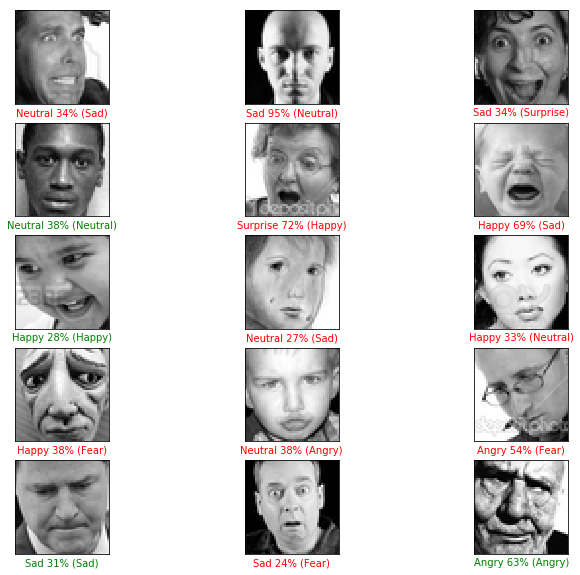

In [30]:
# plot results
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)

